# Selecting-the-RIGHT-Threshold-Value-using-ROC-Curve 🔥

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# using this library to get a dataset, since I don't have one at the moment
from sklearn.datasets import make_classification


### Getting your customized dataset from the sklearn.datasets module 

In [5]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1, 1], random_state=1)


In [7]:
(X.shape, y.shape) # This shows that I have 2000 rows and 20 columns for "X" and 2000 rows and 1 column for "y"


((2000, 20), (2000,))

### Performing Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

ytain_pred = random_forest_model.predict_proba(X_train)
print("RF train roc-auc: {}".format(roc_auc_score(y_train, ytain_pred[:,1])))

ytest_pred = random_forest_model.predict_proba(X_test)
print("RF test roc-auc: {}".format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9816444444444444


### Logistic Regression 

In [13]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

ytain_pred = logistic_classifier.predict_proba(X_train)
print("RF train roc-auc: {}".format(roc_auc_score(y_train, ytain_pred[:,1])))

ytest_pred = logistic_classifier.predict_proba(X_test)
print("RF test roc-auc: {}".format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9863568922694498
RF test roc-auc: 0.9885777777777777


### Adaboost Classifier

In [14]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

ytain_pred = adaboost_classifier.predict_proba(X_train)
print("RF train roc-auc: {}".format(roc_auc_score(y_train, ytain_pred[:,1])))

ytest_pred = adaboost_classifier.predict_proba(X_test)
print("RF test roc-auc: {}".format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9975081174960356
RF test roc-auc: 0.9826111111111111


### KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

ytain_pred = knn_classifier.predict_proba(X_train)
print("RF train roc-auc: {}".format(roc_auc_score(y_train, ytain_pred[:,1])))

ytest_pred = knn_classifier.predict_proba(X_test)
print("RF test roc-auc: {}".format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.981670071491109
RF test roc-auc: 0.9426111111111111


### Now we will focus on selecting the best thershold for maximum accuracy

In [16]:
pred = []
for model in [random_forest_model, logistic_classifier, adaboost_classifier, knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
    
final_prediction = pd.concat(pred, axis=1).mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, final_prediction)))

Ensemble test roc-auc: 0.9849333333333333


In [17]:
pd.concat(pred, axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,1.00,0.966929,0.538202,0.8
3,0.90,0.761539,0.509875,0.8
4,0.61,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,0.95,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


### Calculate the ROC Curve

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.9060034 , 0.90577475, 0.80586092,
       0.8055558 , 0.79760088, 0.79662833, 0.78975303, 0.78821156,
       0.76719585, 0.76537124, 0.7166922 , 0.71637362, 0.71595844,
       0.71393711, 0.65287883, 0.65243537, 0.5996569 , 0.59736186,
       0.58745356, 0.58364346, 0.58077749, 0.57175354, 0.54792732,
       0.54127948, 0.53615858, 0.53139283, 0.52855932, 0.50616892,
       0.44950602, 0.43222765, 0.4296034 , 0.39155357, 0.39129719,
       0.34636723, 0.34336612, 0.23588101, 0.23390421, 0.2321341 ,
       0.22646893, 0.21032943, 0.20848417, 0.1204749 , 0.1203351 ,
       0.10498954])

### Creating the thresholds and accuracy table

In [22]:
from sklearn.metrics import accuracy_score
accuracy_list = []

for thres in thresholds:
    y_pred = np.where(final_prediction > thres,1 ,0)
    accuracy_list.append(accuracy_score(y_test, y_pred, normalize=True))
    
    
accuracy_list = pd.concat([pd.Series(thresholds), pd.Series(accuracy_list)], axis=1)
accuracy_list.columns = ["Thresholds", "Accuracy"]
accuracy_list.sort_values(by="Accuracy", ascending=False, inplace=True)
accuracy_list.head()

# NOTE that the list below already sorted by the highest accuarcy at the TOP with its respective thresolds value, in this case
# 0.432228 is the best threshold

,Thresholds,Accuracy
31,0.432228,0.960000
30,0.449506,0.960000
32,0.429603,0.958333
29,0.506169,0.958333
27,0.531393,0.958333


### Creating the ROC Curve

In [23]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle = "--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

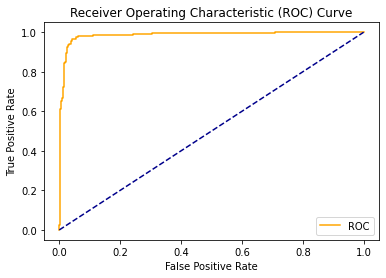

In [24]:
plot_roc_curve(fpr, tpr)

# Greater Area Covered to its "GOOD"